# Week4授業前課題2 住宅価格を分析しよう   

この課題の目的
- 教師あり学習（回帰問題）の概観を知る
- scikit-laernを使い回帰を行えるようにする
- 手法の簡単な比較をする

## 【課題1】 練習のために特徴量の選択

In [1]:
import pandas as pd
import numpy as np

#データセットの読み込み
df = pd.read_csv('train.csv')

#データの抜き出し
df_X = df[['GrLivArea', 'YearBuilt']]
df_X.head()

GrLivArea  YearBuilt
0       1710       2003
1       1262       1976
2       1786       2001
3       1717       1915
4       2198       2000

## 【課題2】 回帰問題のパイプライン

In [2]:
#説明変数、目的変数の抜きだし
df_Xy = df[['GrLivArea', 'YearBuilt', 'SalePrice']]
df_Xy.head()

GrLivArea  YearBuilt  SalePrice
0       1710       2003     208500
1       1262       1976     181500
2       1786       2001     223500
3       1717       1915     140000
4       2198       2000     250000

In [3]:
#データのinfo
df_Xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
GrLivArea    1460 non-null int64
YearBuilt    1460 non-null int64
SalePrice    1460 non-null int64
dtypes: int64(3)
memory usage: 34.3 KB


In [4]:
#データのdescribe
df_Xy.describe()

GrLivArea    YearBuilt      SalePrice
count  1460.000000  1460.000000    1460.000000
mean   1515.463699  1971.267808  180921.195890
std     525.480383    30.202904   79442.502883
min     334.000000  1872.000000   34900.000000
25%    1129.500000  1954.000000  129975.000000
50%    1464.000000  1973.000000  163000.000000
75%    1776.750000  2000.000000  214000.000000
max    5642.000000  2010.000000  755000.000000

説明変数(GrLivAreaとYearBuilt)、目的変数(SalePrice)は全て整数型の数値データである。各特徴量は1460ずつあり、欠損値は存在しない。

In [5]:
#説明変数をX, 目的変数をyのndarrayに格納
X = df_X.values
y = df['SalePrice'].values

In [6]:
from sklearn.model_selection import train_test_split

#データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
from sklearn.preprocessing import StandardScaler

#前処理
sc_X = StandardScaler()
sc_y = StandardScaler()

#学習用データをfit_transform
X_train_std = sc_X.fit_transform(X_train)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()

#検証用データをtransform
X_test_std = sc_X.transform(X_test)
y_test_std = sc_y.transform(y_test[:, np.newaxis]).flatten()

/Users/yuhisoejima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
from sklearn.linear_model import LinearRegression

#学習
linear = LinearRegression()
linear.fit(X_train_std, y_train_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
#推定
y_pred_linear = linear.predict(X_test_std)

In [10]:
from sklearn.metrics import mean_squared_error

#評価
linear_mse = mean_squared_error(y_test_std, y_pred_linear)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

def scatter(X_train, y_train, X_test, y_test, xlabel='xlabel', ylabel='SalePrice', title='title'):
    '''
    可視化を行うための関数

    Parameters
    ---------------
    X_train : ndarray, shape(n_samples, 1)
        学習用データ
    y_train : ndarray, shape(n_samples, 1)
        学習用データ
    X_test : ndarray, shape(n_samples, 1)
        検証用データ
    y_test : ndarray, shape(n_samples, 1)
        検証用データ
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    '''
    plt.scatter(X_train, y_train, color='red',  edgecolors="red", alpha=0.3, linewidths="2")
    plt.scatter(X_test, y_test, color='blue', edgecolors="blue", alpha=0.3, linewidths="2")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

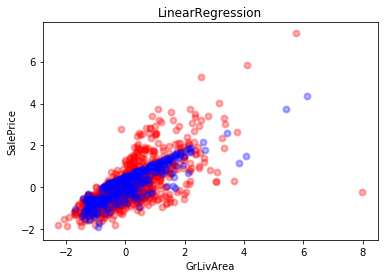

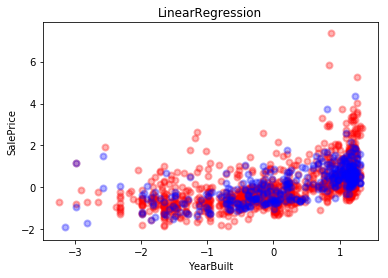

In [12]:
#可視化
scatter(X_train_std[:, 0], y_train_std, X_test_std[:, 0], y_pred_linear, xlabel='GrLivArea', title='LinearRegression')
scatter(X_train_std[:, 1], y_train_std, X_test_std[:, 1], y_pred_linear, xlabel='YearBuilt', title='LinearRegression')

## 【課題3】 手法の比較

### ・SVM

In [13]:
from sklearn.svm import SVR

#学習
svm = SVR()
svm.fit(X_train_std, y_train_std)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [14]:
#推定
y_pred_svm = svm.predict(X_test_std)

In [15]:
#評価
svm_mse = mean_squared_error(y_test_std, y_pred_svm)

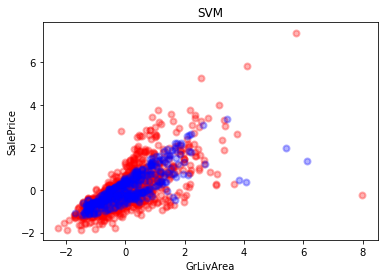

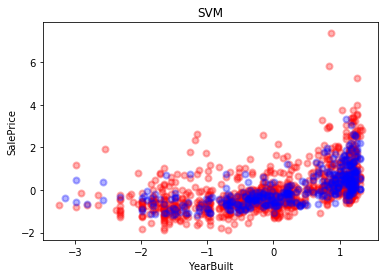

In [16]:
#可視化
scatter(X_train_std[:, 0], y_train_std, X_test_std[:, 0], y_pred_svm, xlabel='GrLivArea', title='SVM')
scatter(X_train_std[:, 1], y_train_std, X_test_std[:, 1], y_pred_svm, xlabel='YearBuilt', title='SVM')

### ・決定木

In [17]:
from sklearn.tree import DecisionTreeRegressor

#学習
tree = DecisionTreeRegressor()
tree.fit(X_train_std, y_train_std)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [18]:
#推定
y_pred_tree= tree.predict(X_test_std)

In [19]:
#評価
tree_mse = mean_squared_error(y_test_std, y_pred_tree)

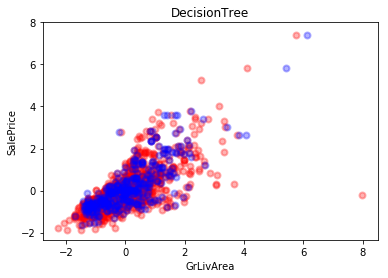

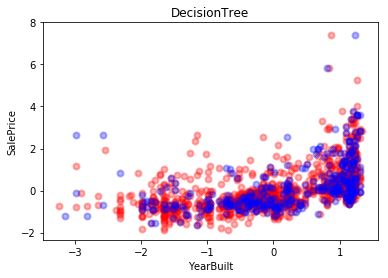

In [20]:
#可視化
scatter(X_train_std[:, 0], y_train_std, X_test_std[:, 0], y_pred_tree, xlabel='GrLivArea', title='DecisionTree')
scatter(X_train_std[:, 1], y_train_std, X_test_std[:, 1], y_pred_tree, xlabel='YearBuilt', title='DecisionTree')

### ・ランダムフォレスト

In [21]:
from sklearn.ensemble import RandomForestRegressor

#学習
forest = RandomForestRegressor()
forest.fit(X_train_std, y_train_std)

/Users/yuhisoejima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
#推定
y_pred_forest= forest.predict(X_test_std)

In [23]:
#評価
forest_mse = mean_squared_error(y_test_std, y_pred_forest)

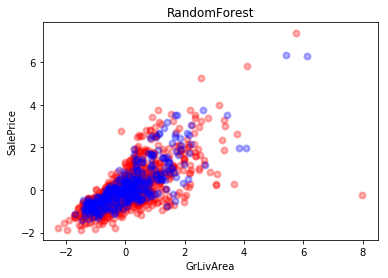

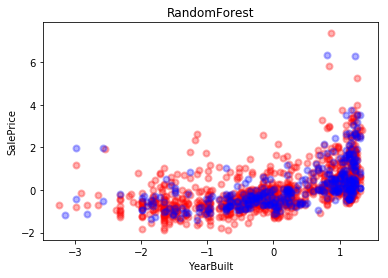

In [24]:
#可視化
scatter(X_train_std[:, 0], y_train_std, X_test_std[:, 0], y_pred_forest, xlabel='GrLivArea', title='RandomForest')
scatter(X_train_std[:, 1], y_train_std, X_test_std[:, 1], y_pred_forest, xlabel='YearBuilt', title='RandomForest')

In [25]:
#各手法のMSEの表
score = pd.DataFrame([linear_mse, svm_mse, tree_mse, forest_mse], 
                                     index = ['線形回帰', 'SVM', '決定木', 'ランダムフォレスト'],
                                    columns = ['MSE'])

score

MSE
線形回帰       0.496114
SVM        0.462292
決定木        0.635170
ランダムフォレスト  0.436485

平均二乗誤差(MSE)は推定値との差分の二乗の平均であり、この値が小さいほど良いと言える。今回の結果は決定木が一番悪く、その他の手法はあまり変わらなかった。可視化した図は、決定木が一番広がりのある図(バラバラな図)になっているように感じた。

## 【課題4】 各パラメータの意味

### ・線形回帰   

重要なパラメータは存在しないので、実施しない。

### ・SVM   

SVRでは、Cが正則化のパラメータであり、gammaがRBFカーネルパラメータである。

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 0.1 , gammaが 0.1
MSE : 0.5529855888481595


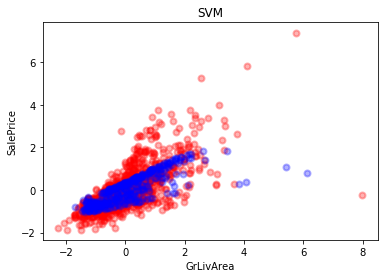

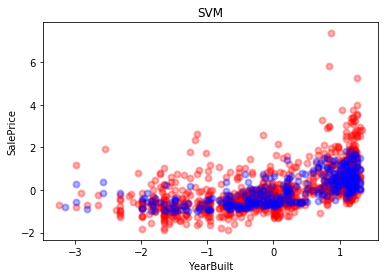

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 0.1 , gammaが 1
MSE : 0.5975798377333127


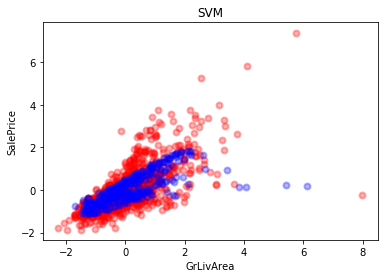

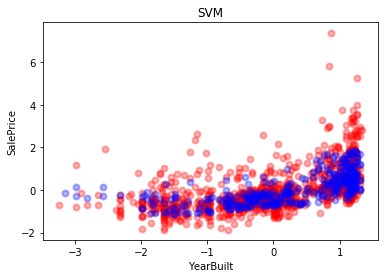

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 0.1 , gammaが 10
MSE : 0.7669432583006119


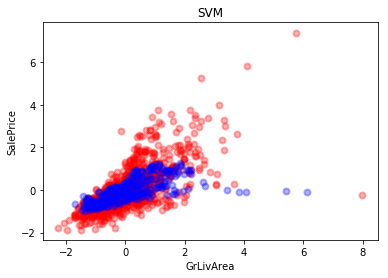

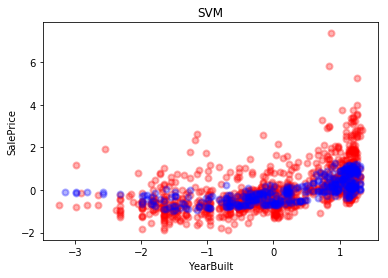

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 1 , gammaが 0.1
MSE : 0.45199079045004203


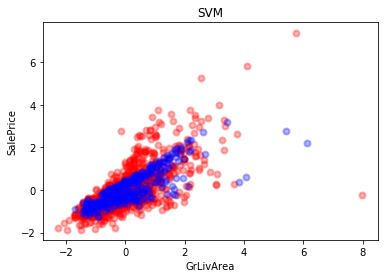

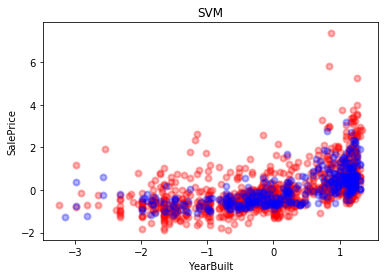

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 1 , gammaが 1
MSE : 0.48134853348878764


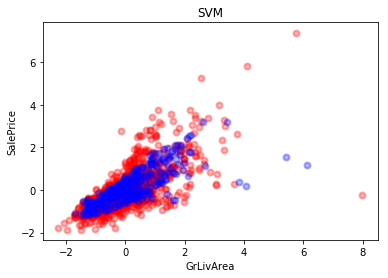

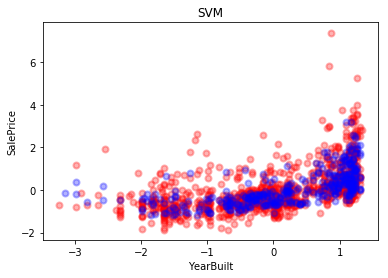

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 1 , gammaが 10
MSE : 0.5504794798245131


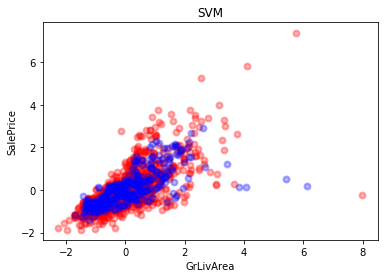

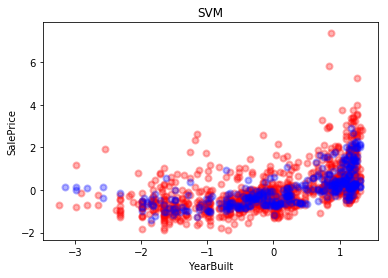

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 10 , gammaが 0.1
MSE : 0.44122625148856737


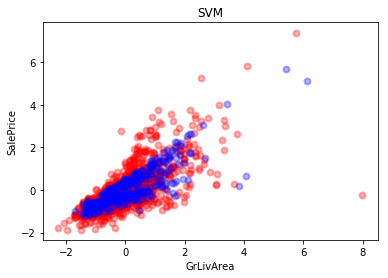

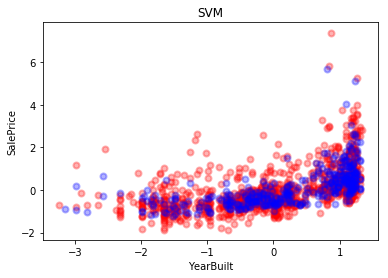

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 10 , gammaが 1
MSE : 0.44823132478477123


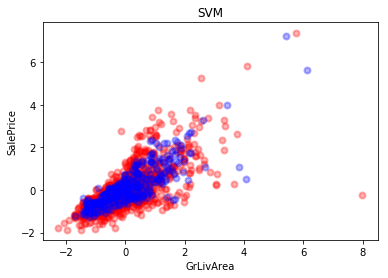

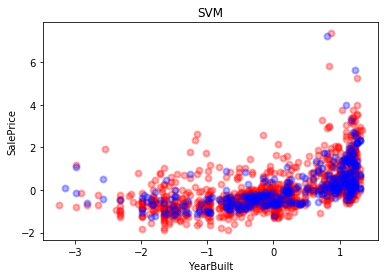

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Cが 10 , gammaが 10
MSE : 0.4293428931796678


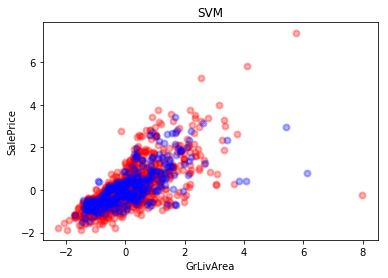

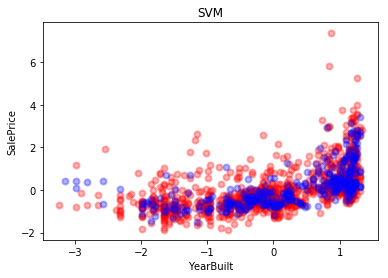

In [26]:
#C, gammaを変化させてMSEを確認する
svm_C = [0.1, 1, 10]
gamma = [0.1, 1, 10]

for i in svm_C:
    for j in gamma:
    
        #学習
        svm_tuning = SVR(C=i, gamma=j)
        svm_tuning.fit(X_train_std, y_train_std)

        #推定
        y_pred_svm_tuning = svm_tuning.predict(X_test_std)
        
        print('- ' * 89, '\n')
        print('Cが', i, ', gammaが', j)
        
        #評価
        svm_tuning_mse = mean_squared_error(y_test_std, y_pred_svm_tuning)
        print('MSE :', svm_tuning_mse)
        
        #可視化
        scatter(X_train_std[:, 0], y_train_std, X_test_std[:, 0], y_pred_svm_tuning, xlabel='GrLivArea', title='SVM')
        scatter(X_train_std[:, 1], y_train_std, X_test_std[:, 1], y_pred_svm_tuning, xlabel='YearBuilt', title='SVM')

C=10, gamma=10の組み合わせが一番MSEが低かった。

### ・決定木   

DecisionTreeRegressorでは、max_depthが木の深さを指定するパラメータである。

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 3
MSE : 0.5365986631782691


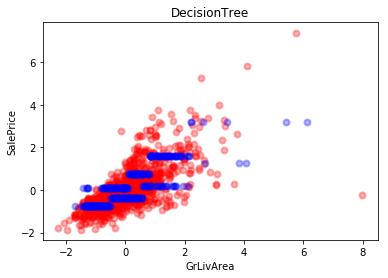

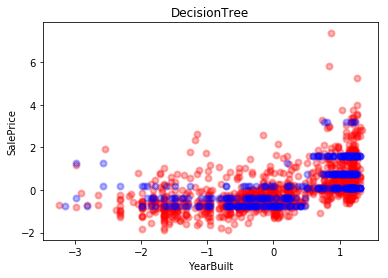

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 4
MSE : 0.4696066982170128


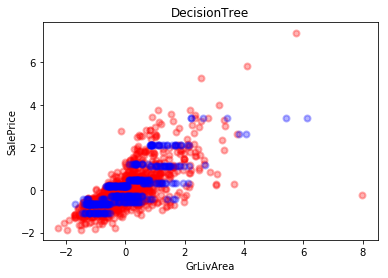

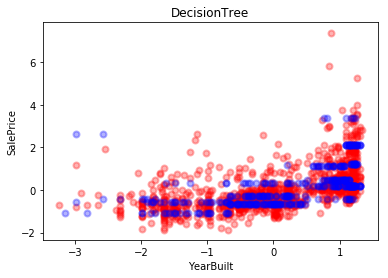

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 5
MSE : 0.48439481418970237


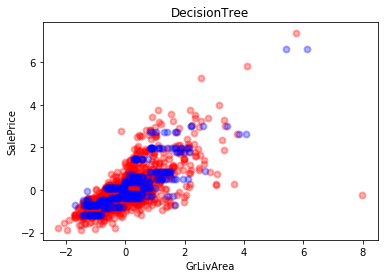

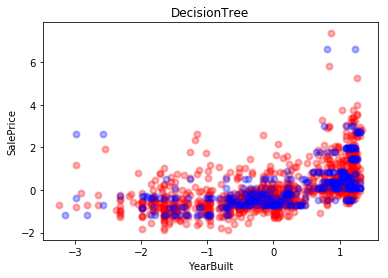

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 6
MSE : 0.4911129392916277


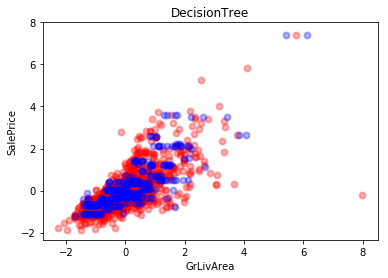

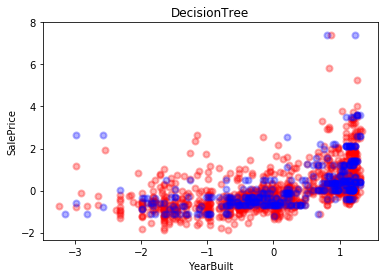

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 7
MSE : 0.5381306175747621


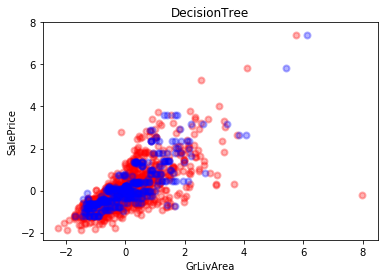

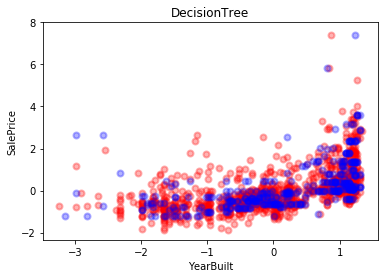

In [41]:
#max_depthを変化させて、MSEを確認する
for i in range(3, 8):
    
    #学習
    tree_tuning = DecisionTreeRegressor(max_depth=i)
    tree_tuning.fit(X_train_std, y_train_std)

    #推定
    y_pred_tree_tuning = tree_tuning.predict(X_test_std)
    
    print('- ' * 89, '\n')
    print('max_depthが', i)
    
    #評価
    tree_tuning_mse = mean_squared_error(y_test_std, y_pred_tree_tuning)
    print('MSE :', tree_tuning_mse)
    
    #可視化
    scatter(X_train_std[:, 0], y_train_std, X_test_std[:, 0], y_pred_tree_tuning, xlabel='GrLivArea', title='DecisionTree')
    scatter(X_train_std[:, 1], y_train_std, X_test_std[:, 1], y_pred_tree_tuning, xlabel='YearBuilt', title='DecisionTree')

max_depth=4が一番MSEが低かった。

### ・ランダムフォレスト   

RandomForestRegressorでは、max_depthが各決定木の深さであり、n_estimatorsが多数決に使用する決定木の個数である。

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 4 , n_estimatorsが 10
mse : 0.38708829328027927


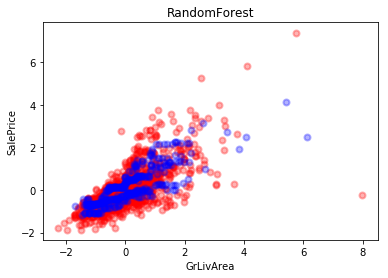

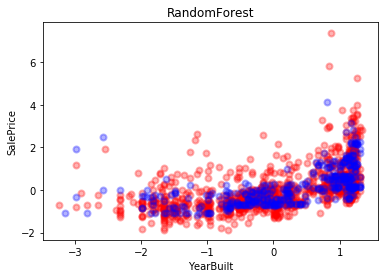

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 4 , n_estimatorsが 50
mse : 0.4111240493187508


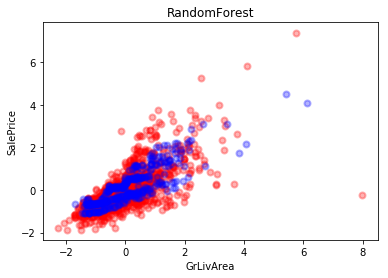

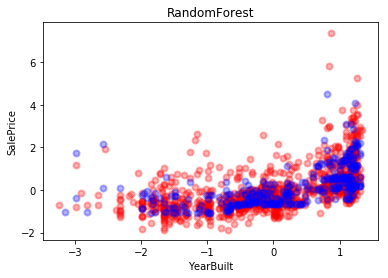

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 4 , n_estimatorsが 100
mse : 0.41212940304283446


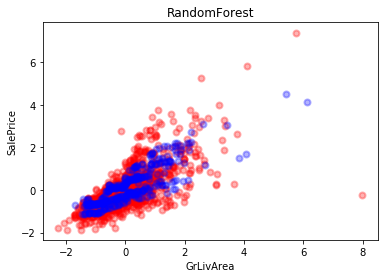

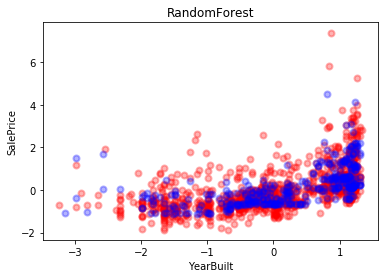

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 6 , n_estimatorsが 10
mse : 0.4041130072233458


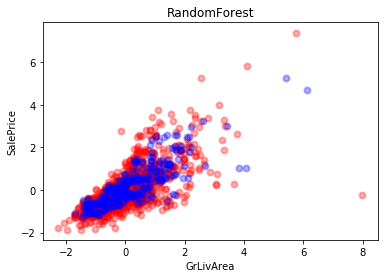

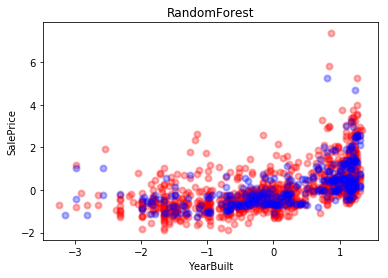

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 6 , n_estimatorsが 50
mse : 0.38012766218182836


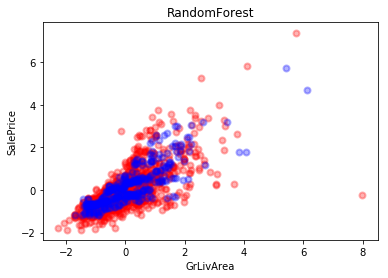

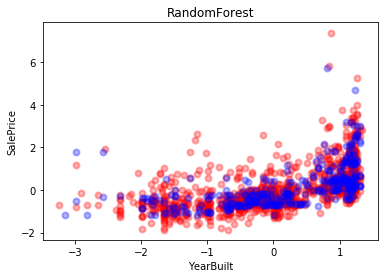

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 6 , n_estimatorsが 100
mse : 0.39657692490823043


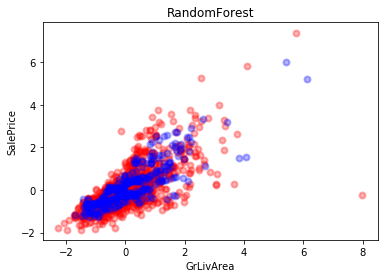

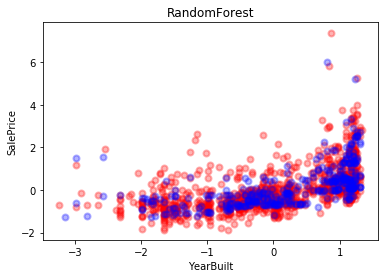

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 8 , n_estimatorsが 10
mse : 0.4169765738195277


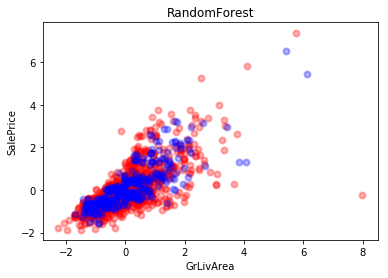

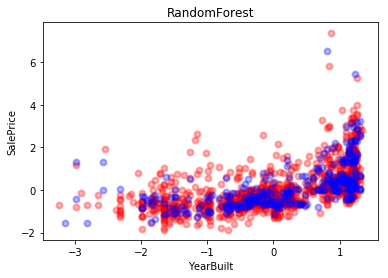

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 8 , n_estimatorsが 50
mse : 0.3823132187623226


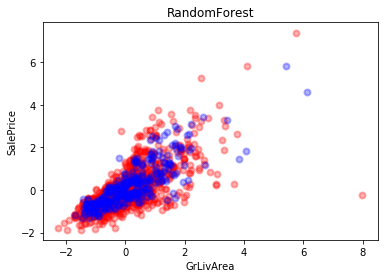

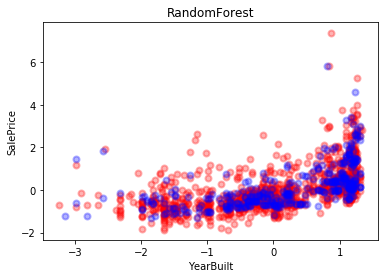

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 8 , n_estimatorsが 100
mse : 0.3748930906226917


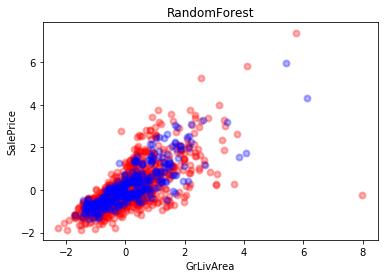

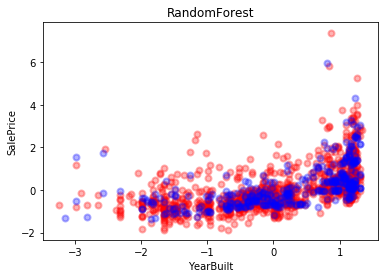

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 10 , n_estimatorsが 10
mse : 0.37693295928910014


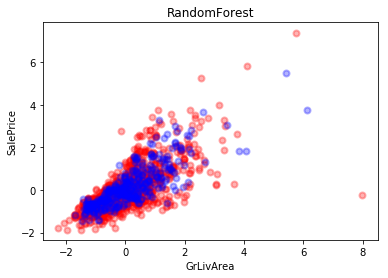

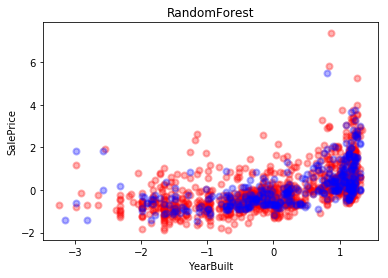

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 10 , n_estimatorsが 50
mse : 0.41157656402151477


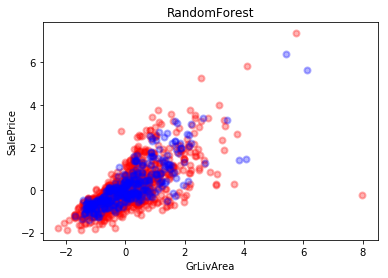

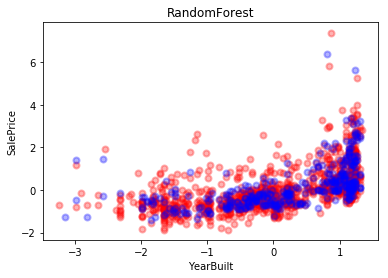

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

max_depthが 10 , n_estimatorsが 100
mse : 0.4071538782867856


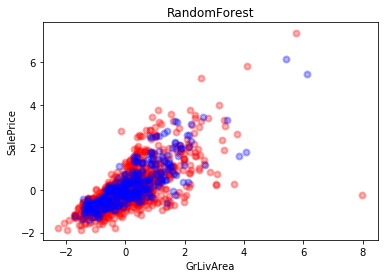

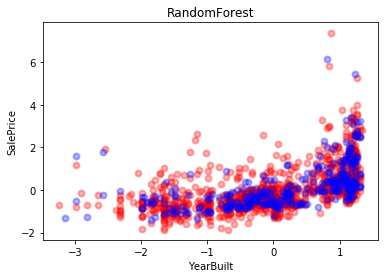

In [28]:
#max_depth, n_estimatorsを変化させて、MSEを確認する
n_estimators = [10, 50, 100]
for i in range(4, 11, 2):
    for j in n_estimators:
    
        #学習
        forest_tuning = RandomForestRegressor(max_depth=i, n_estimators=j)
        forest_tuning.fit(X_train_std, y_train_std)

        #推定
        y_pred_forest_tuning = forest_tuning.predict(X_test_std)

        print('- ' * 89, '\n')
        print('max_depthが', i, ', n_estimatorsが', j)

        #評価
        forest_tuning_mse = mean_squared_error(y_test_std, y_pred_forest_tuning)
        print('mse :', forest_tuning_mse)

        #可視化
        scatter(X_train_std[:, 0], y_train_std, X_test_std[:, 0], y_pred_forest_tuning, xlabel='GrLivArea', title='RandomForest')
        scatter(X_train_std[:, 1], y_train_std, X_test_std[:, 1], y_pred_forest_tuning, xlabel='YearBuilt', title='RandomForest')

max_depth=8, n_estimators=100の組み合わせが一番MSEが低かった。

## 【課題5】 他の特徴量も使用しての学習

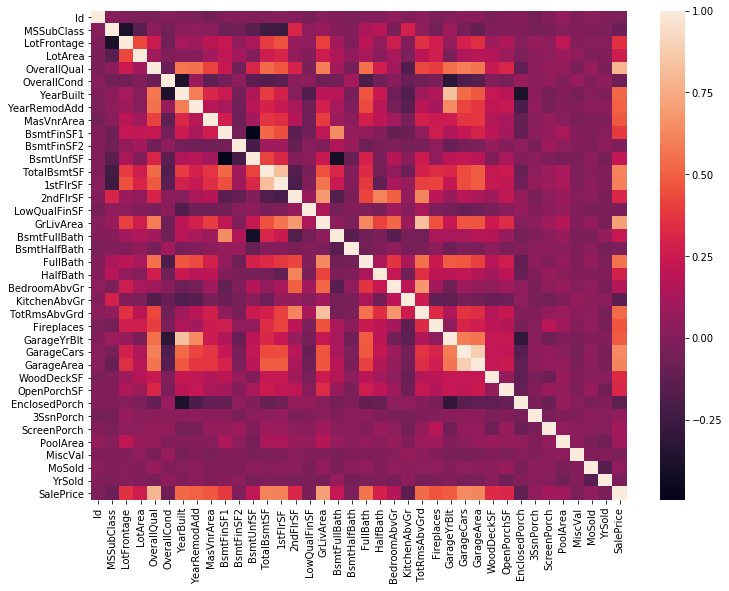

In [29]:
#ヒートマップ
import seaborn as sns
df_corr = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(df_corr);

In [30]:
#SalePriceとの相関を降順にsort
df_sort = df_corr.iloc[-1].sort_values(ascending=False).head(11)
df_sort

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

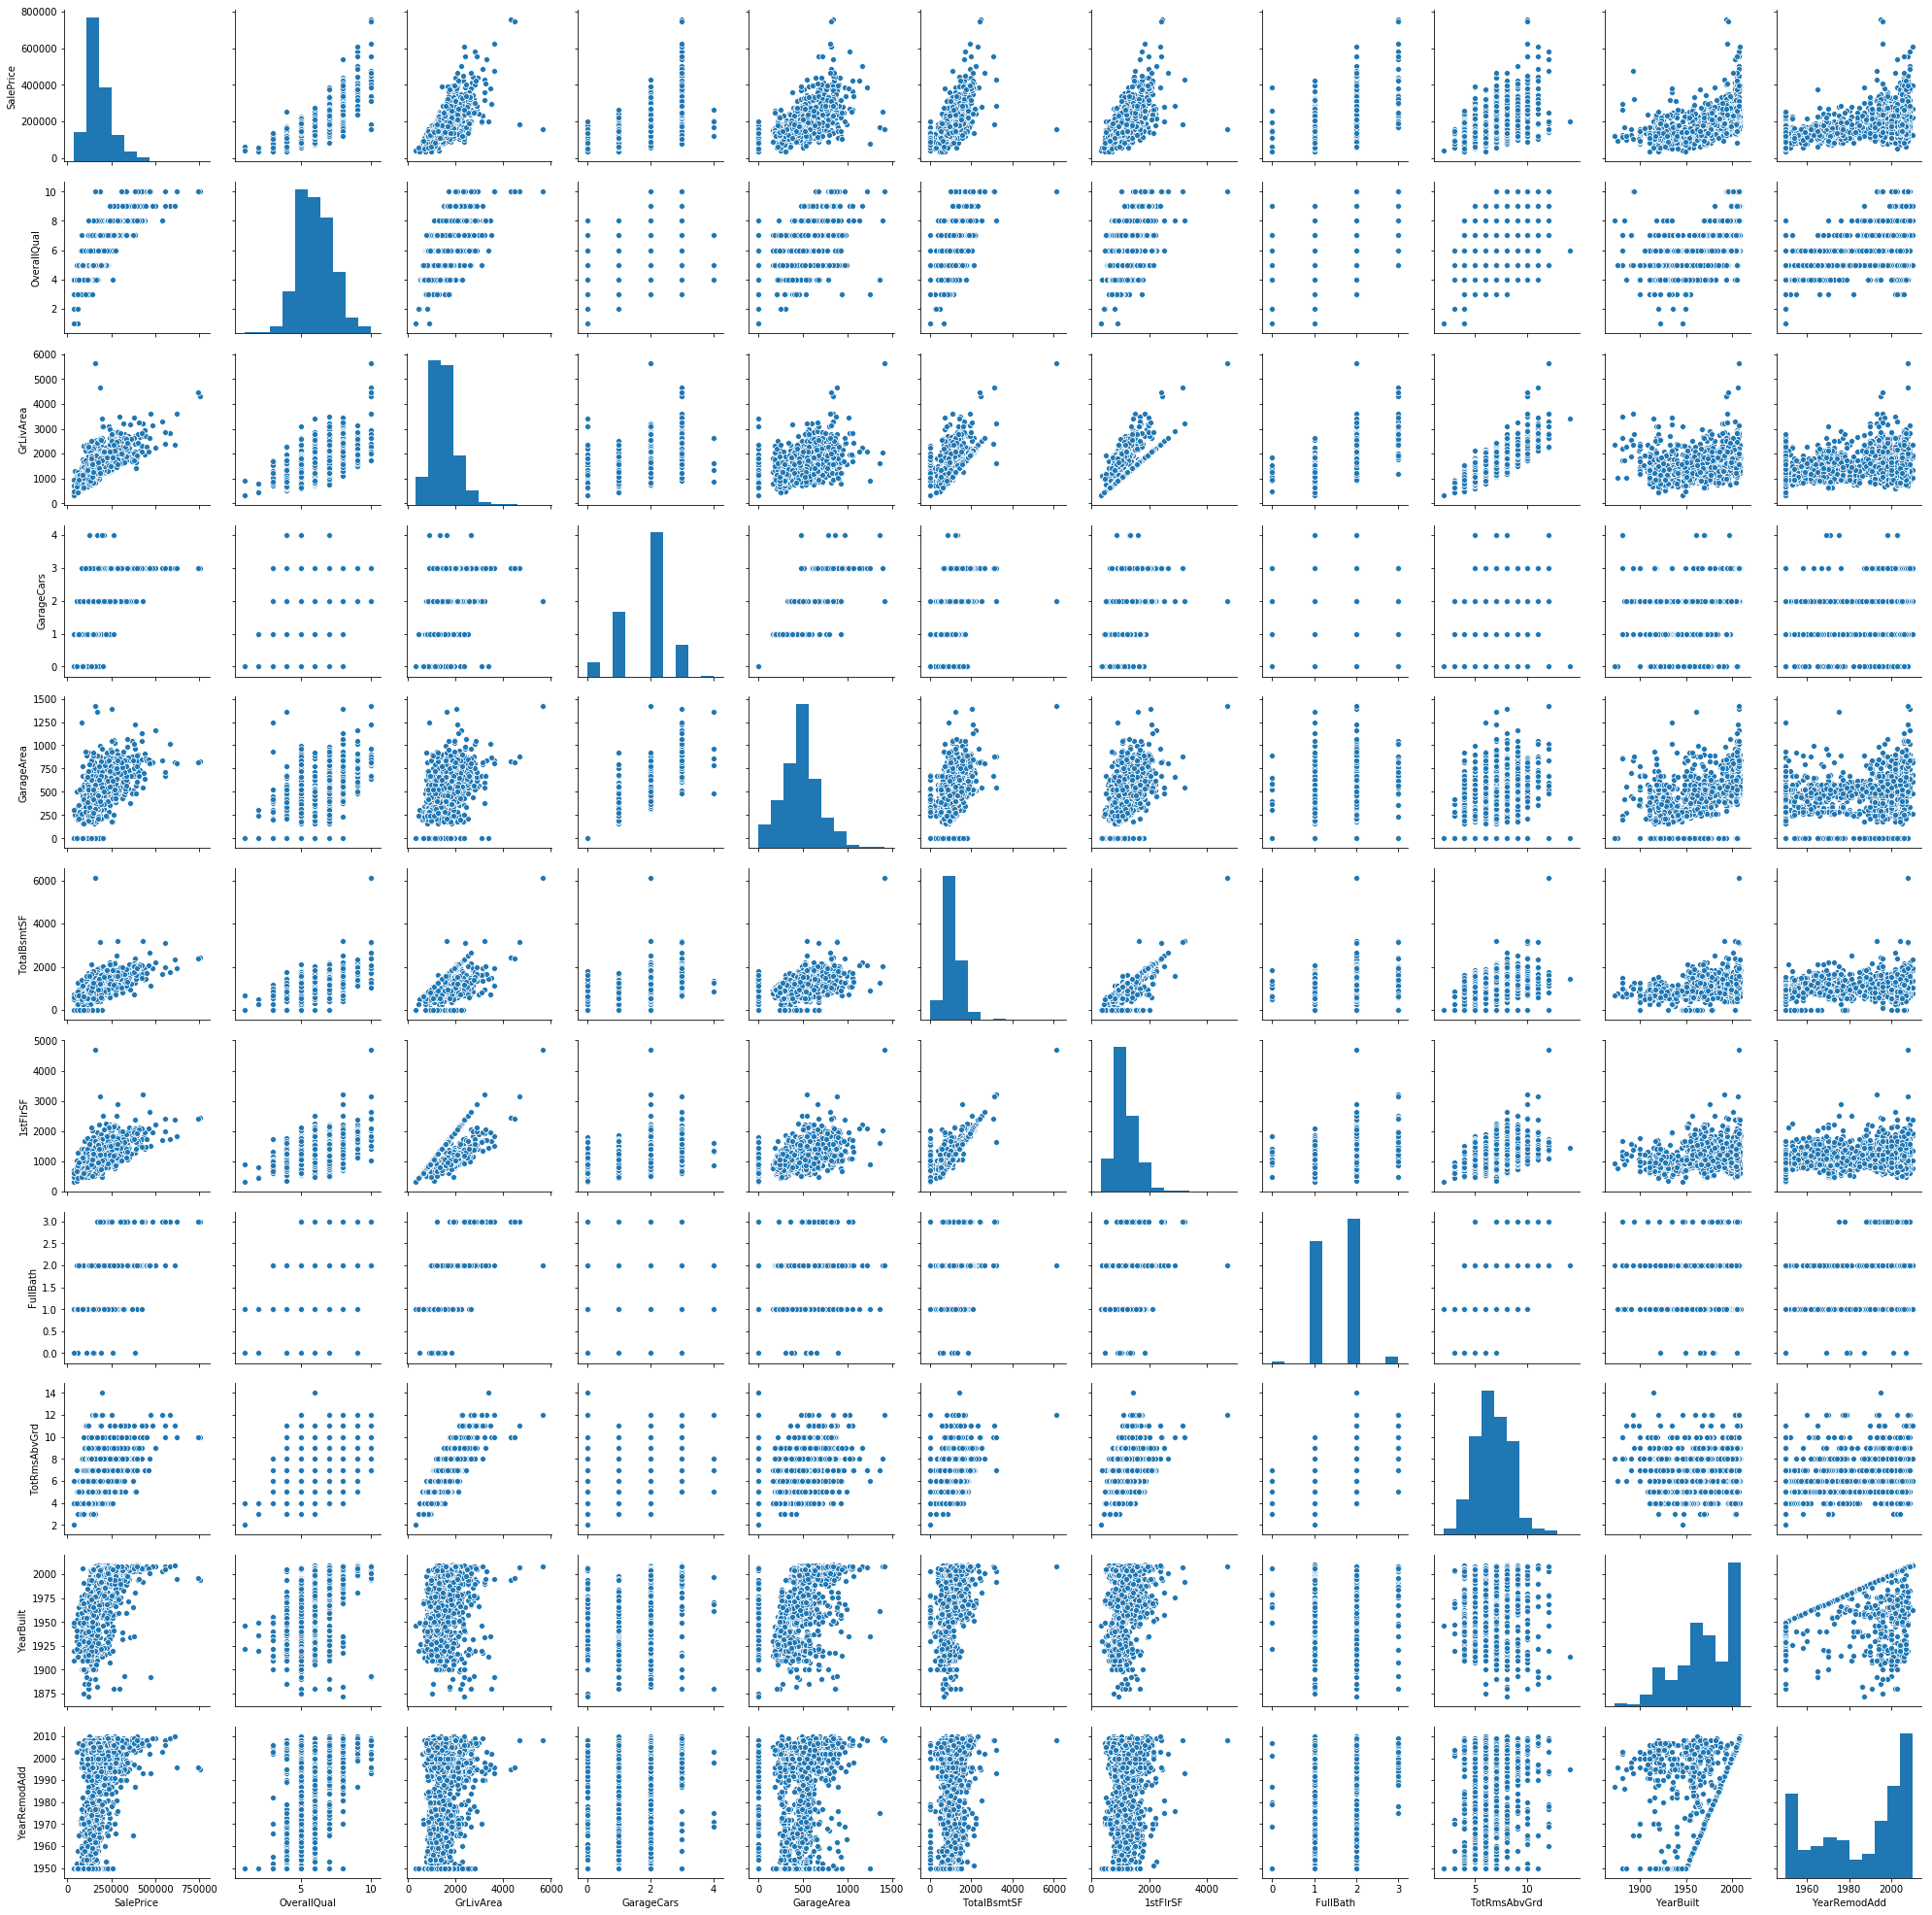

In [31]:
#SalePriceと相関の高い特徴量で散布図行列
df_index = df_sort.index
sns.pairplot(df[df_index]);

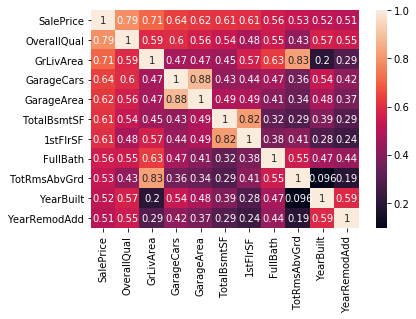

In [32]:
#SalePriceと相関の高い特徴量でヒートマップ
sns.heatmap(df_corr.loc[df_index, df_index], annot=True);

今回はSalePriceと相関の高い上位5つの特徴量を使用して、各パラメータごとに評価する。

In [33]:
#使用する特徴量のリスト
X5_list = ['OverallQual', 'GrLivArea',  'GarageCars', 'GarageArea', 'TotalBsmtSF']

#X5に目的変数、y5に説明変数をndarrayとして格納
X5 = df.loc[:, X5_list].values
y5 = df.iloc[:, -1].values

#データの分割
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5)

#前処理
sc_X5 = StandardScaler()
sc_y5 = StandardScaler()

#学習用データをfit_transform
X5_train_std = sc_X5.fit_transform(X5_train)
y5_train_std = sc_y5.fit_transform(y5_train[:, np.newaxis]).flatten()

#検証用データをtransform
X5_test_std = sc_X5.transform(X5_test)
y5_test_std = sc_y5.transform(y5_test[:, np.newaxis]).flatten()

/Users/yuhisoejima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/yuhisoejima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/yuhisoejima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/yuhisoejima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni

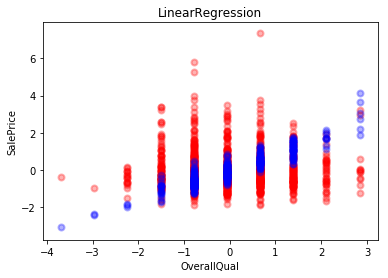

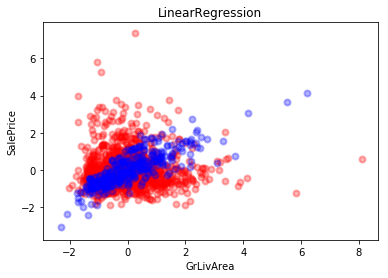

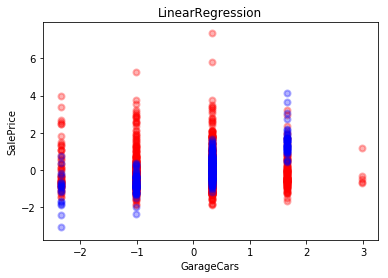

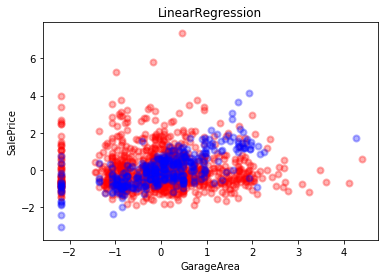

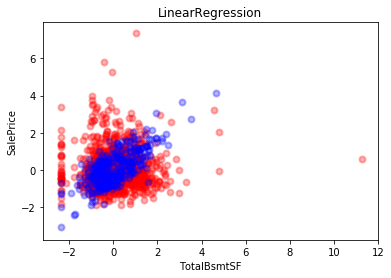

In [34]:
#LinearRegression
#学習
linear5 = LinearRegression()
linear5.fit(X5_train_std, y5_train_std)

#推定
y5_pred_linear = linear5.predict(X5_test_std)

#評価
linear5_mse = mean_squared_error(y5_test_std, y5_pred_linear)

#可視化
for i in range(5):
    scatter(X5_train_std[:, i], y_train_std, X5_test_std[:, i], y5_pred_linear, xlabel=X5_list[i], title='LinearRegression')

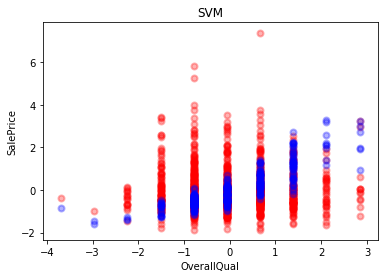

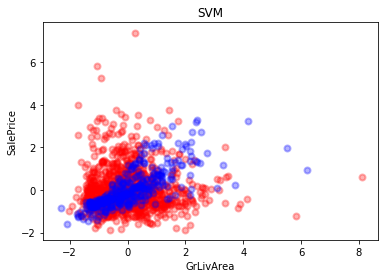

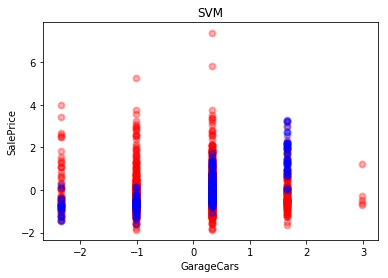

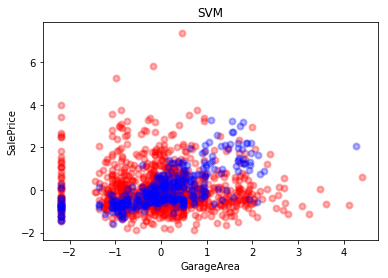

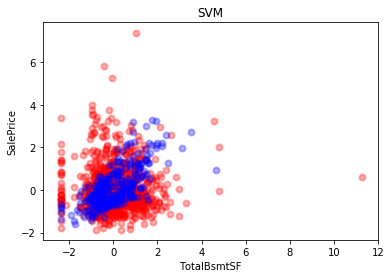

In [35]:
#SVR
#学習
svm5 = SVR()
svm5.fit(X5_train_std, y5_train_std)

#推定
y5_pred_svm = svm5.predict(X5_test_std)

#評価
svm5_mse = mean_squared_error(y5_test_std, y5_pred_svm)

#可視化
for i in range(5):
    scatter(X5_train_std[:, i], y_train_std, X5_test_std[:, i], y5_pred_svm, xlabel=X5_list[i], title='SVM')

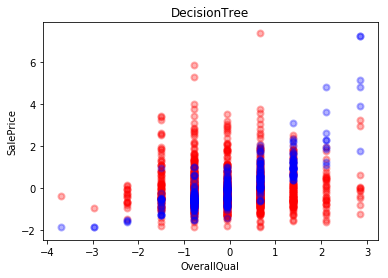

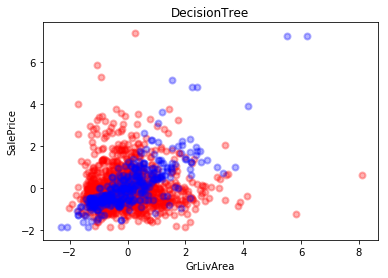

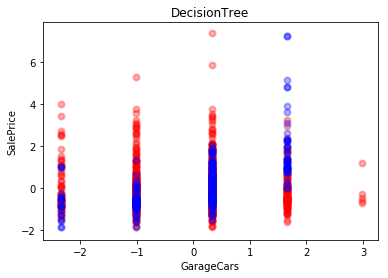

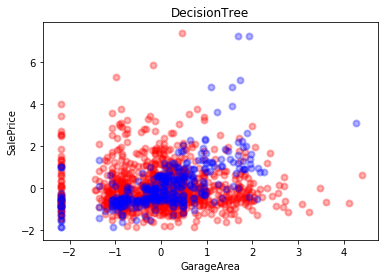

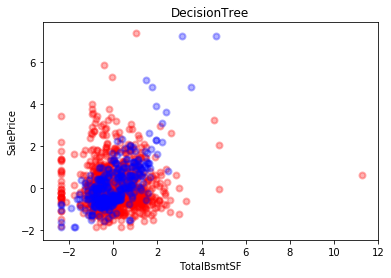

In [36]:
#DecisionTreeRegressor
#学習
tree5 = DecisionTreeRegressor()
tree5.fit(X5_train_std, y5_train_std)

#推定
y5_pred_tree = tree5.predict(X5_test_std)

#評価
tree5_mse = mean_squared_error(y5_test_std, y5_pred_tree)

#可視化
for i in range(5):
    scatter(X5_train_std[:, i], y_train_std, X5_test_std[:, i], y5_pred_tree, xlabel=X5_list[i], title='DecisionTree')

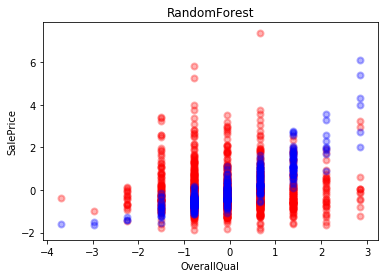

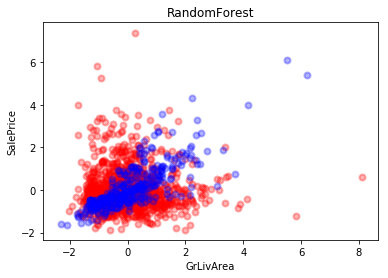

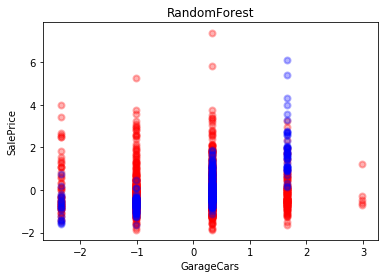

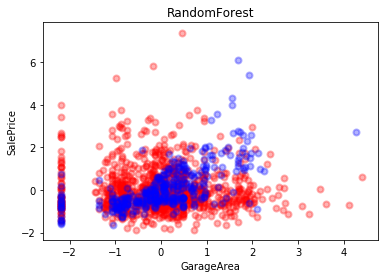

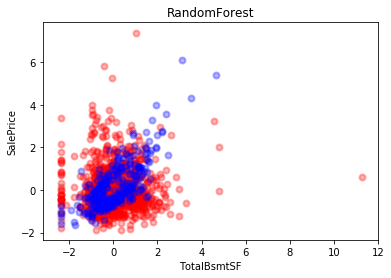

In [37]:
#RandomForestRegressor
#学習
forest5 = RandomForestRegressor()
forest5.fit(X5_train_std, y5_train_std)

#推定
y5_pred_forest = forest5.predict(X5_test_std)

#評価
forest5_mse = mean_squared_error(y5_test_std, y5_pred_forest)

#可視化
for i in range(5):
    scatter(X5_train_std[:, i], y_train_std, X5_test_std[:, i], y5_pred_forest, xlabel=X5_list[i], title='RandomForest')

In [38]:
#特徴量を追加した場合のMSE
score5 = pd.DataFrame([linear5_mse, svm5_mse, tree5_mse, forest5_mse], 
                                     index = ['線形回帰', 'SVM', '決定木', 'ランダムフォレスト'],
                                    columns = ['MSE'])

score5

MSE
線形回帰       0.272672
SVM        0.223394
決定木        0.400870
ランダムフォレスト  0.236210

In [39]:
#特徴量が2つのときのMSE
score

MSE
線形回帰       0.496114
SVM        0.462292
決定木        0.635170
ランダムフォレスト  0.436485

特徴量を追加する前と後とを比較すると、追加した後のほうが全体的にMSEの値が低くなっており、誤差が少なくなったと言える。こちらも特徴量が2つの時と同様に、決定木が一番MSEが高くなっていた。